<a href="https://colab.research.google.com/github/carloscastillo10/predicting-academic-performance/blob/main/may-2023/final-data-exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = 50

In [2]:
final_data = pd.read_csv('data/final-data.csv', dtype = {
    'ciclo_academico': 'object',
    'codigo_periodo': 'object',
    'periodo_admision': 'object', 
})

# Detección de valores atípicos

### Valores atípicos del componente **`AA`**

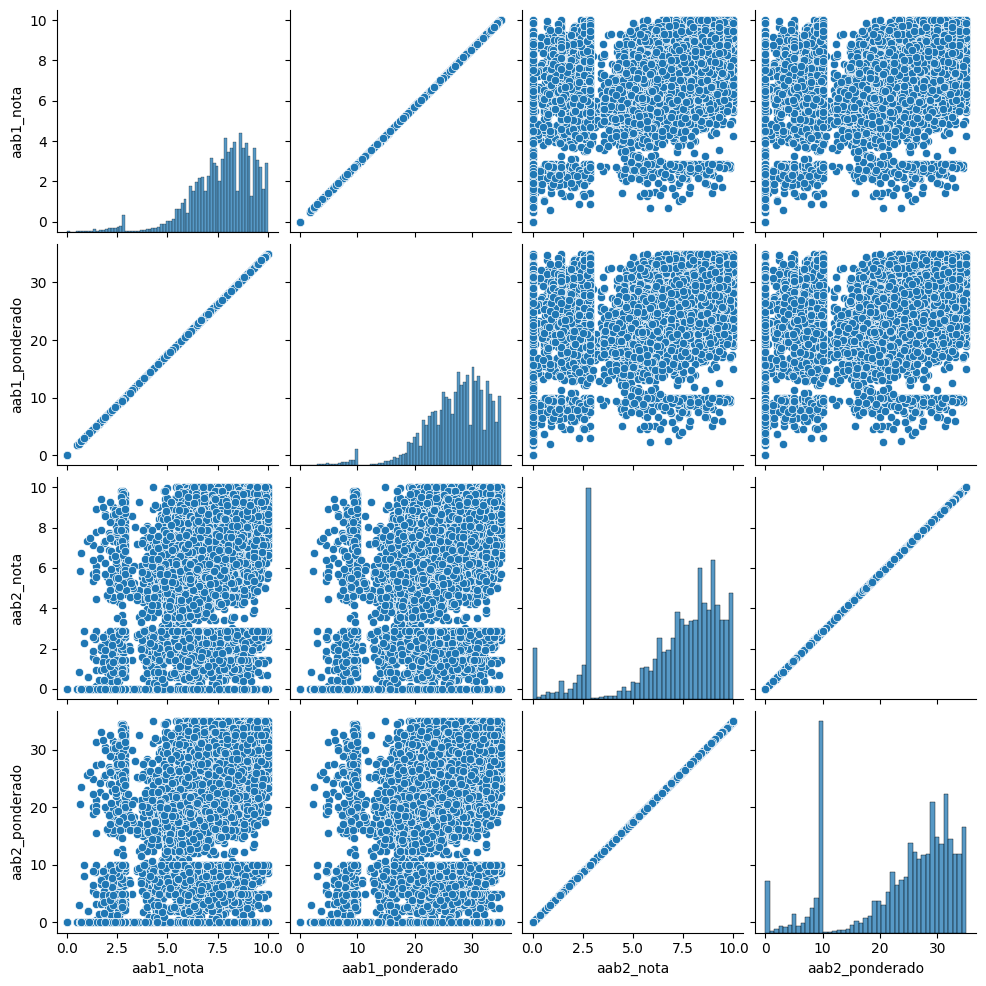

In [4]:
sns.pairplot(final_data[[
    'aab1_nota',
    'aab1_ponderado',
    'aab2_nota',
    'aab2_ponderado',
]])

### Valores atípicos del componente **`ACD`**

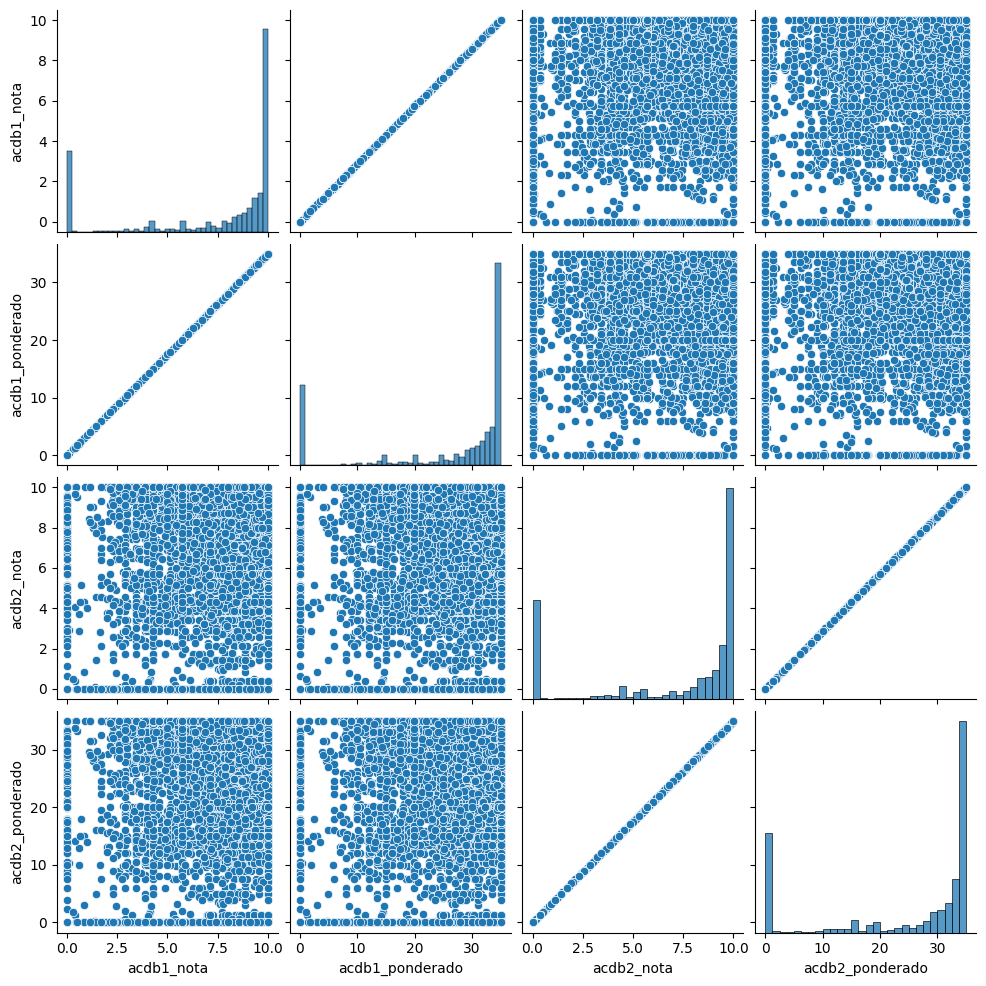

In [5]:
sns.pairplot(final_data[[
    'acdb1_nota',
    'acdb1_ponderado',
    'acdb2_nota',
    'acdb2_ponderado',
]])

### Valores atípicos del componente **`APE`**

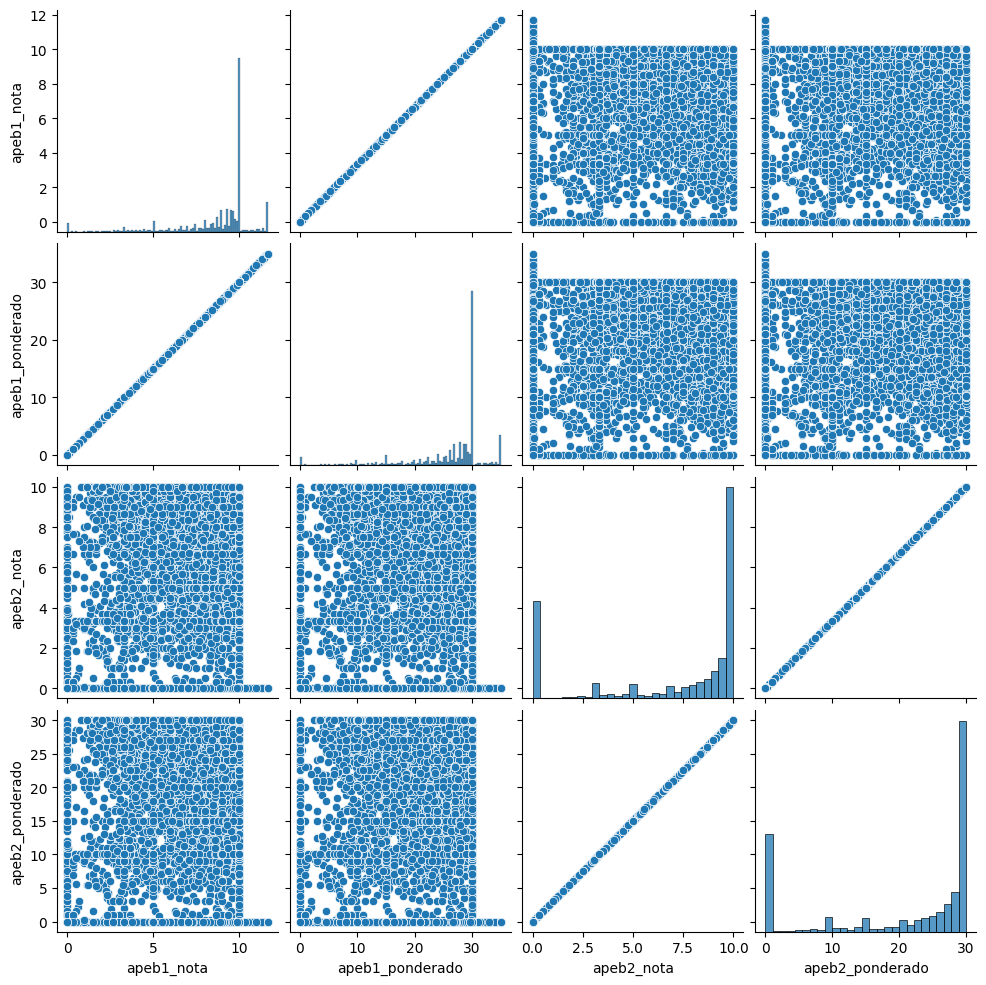

In [6]:
sns.pairplot(final_data[[
    'apeb1_nota',
    'apeb1_ponderado',
    'apeb2_nota',
    'apeb2_ponderado',
]])

### Valores atípicos de las columnas:
* `numero_reprobaciones`
* `final_nota`
* `final_ponderado`
* `tasa_aprobacion`

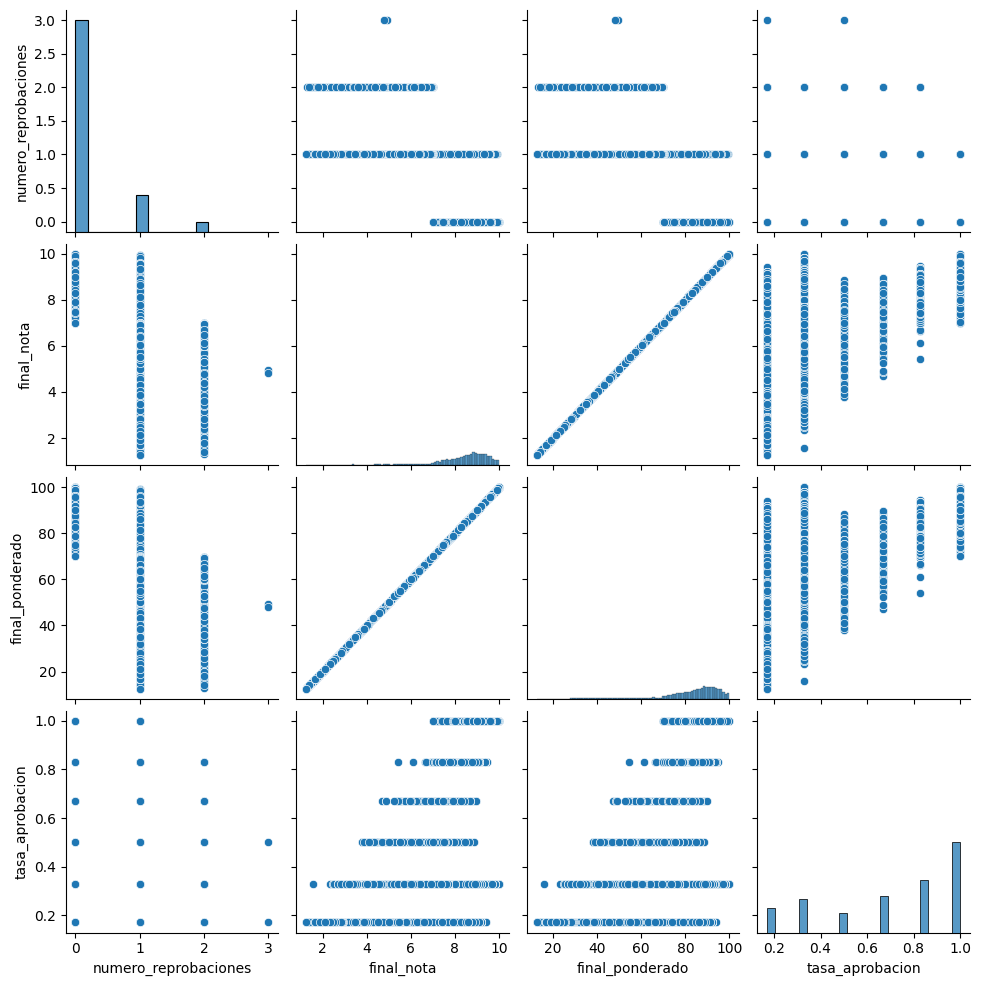

In [7]:
sns.pairplot(final_data[[
    'numero_reprobaciones', 
    'final_nota',
    'final_ponderado',
    'tasa_aprobacion'
]])

## En el gráfico de pares solo se puede observar un solo valor atípico que es: un valor con solo dos ocurrencias en el **número de reprobaciones**.

In [8]:
final_data[final_data['numero_reprobaciones'] > 2]

,fake_identificacion,ciclo_academico,codigo_programa,codigo_malla,codigo_periodo,region,zona,centro,tipo_de_est_programa,tipo_de_ingreso,periodo_admision,estatus_cursos,estatus_de_pago,descripcion_de_becas,porcentaje_de_beca,descripcion_descuento,porcentaje_des_matricula,monto_descuento_automatico,convenios_y_contratos,formas_de_pago,tipo_de_pago,provincia,canton,edad,sexo,discapacidad,tipo_discapacidad,porcentaje_de_discapacidades,numero_discapacidades,curso_codigo,curso_nombre,numero_reprobaciones,status,aab1_nota,aab1_ponderado,acdb1_nota,acdb1_ponderado,apeb1_nota,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
7756,GGEZ49892458340756,2,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO,CONTINUO,ADAPTACION DE CARRERA/MALLA,202162.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESCUENTO COVID-19 ARANCELES GRADO - DESCUENT...,20.0,41.52,COOPERATIVA DE AHORRO Y CREDITO ALIANZA DEL VALLE,TARJETA ONLINE,PAGO CON TARJETA,NO DEFINIDO,NO DEFINIDO,31.0,HOMBRE,NO,NO DEFINIDO,0,0,DSOF_1072,COMPUTACION UBICUA,3,REPROBADA,7.31,25.59,1.71,5.99,10.0,30.0,7.86,27.51,0.00,0.00,3.33,9.99,4.93,49.3,0.50
7762,GGEZ49892458340756,2,INFO_D1,IFD6,202264,QUITO,METROPOLIT,QUITO,CONTINUO,ADAPTACION DE CARRERA/MALLA,202162.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESC RED. FAC. INGENIERIAS Y ARQUITECTURA GR.D...,20.0,41.52,COOPERATIVA DE AHORRO Y CREDITO ALIANZA DEL VALLE,TARJETA ONLINE,PAGO CON TARJETA,NO DEFINIDO,NO DEFINIDO,31.0,HOMBRE,NO,NO DEFINIDO,0,0,DSOF_1072,COMPUTACION UBICUA,3,REPROBADA,6.37,22.30,0.00,0.00,5.0,15.0,8.17,28.59,5.71,19.98,3.33,9.99,4.80,48.0,0.17


# Correlación entre variables numéricas

<Axes: >

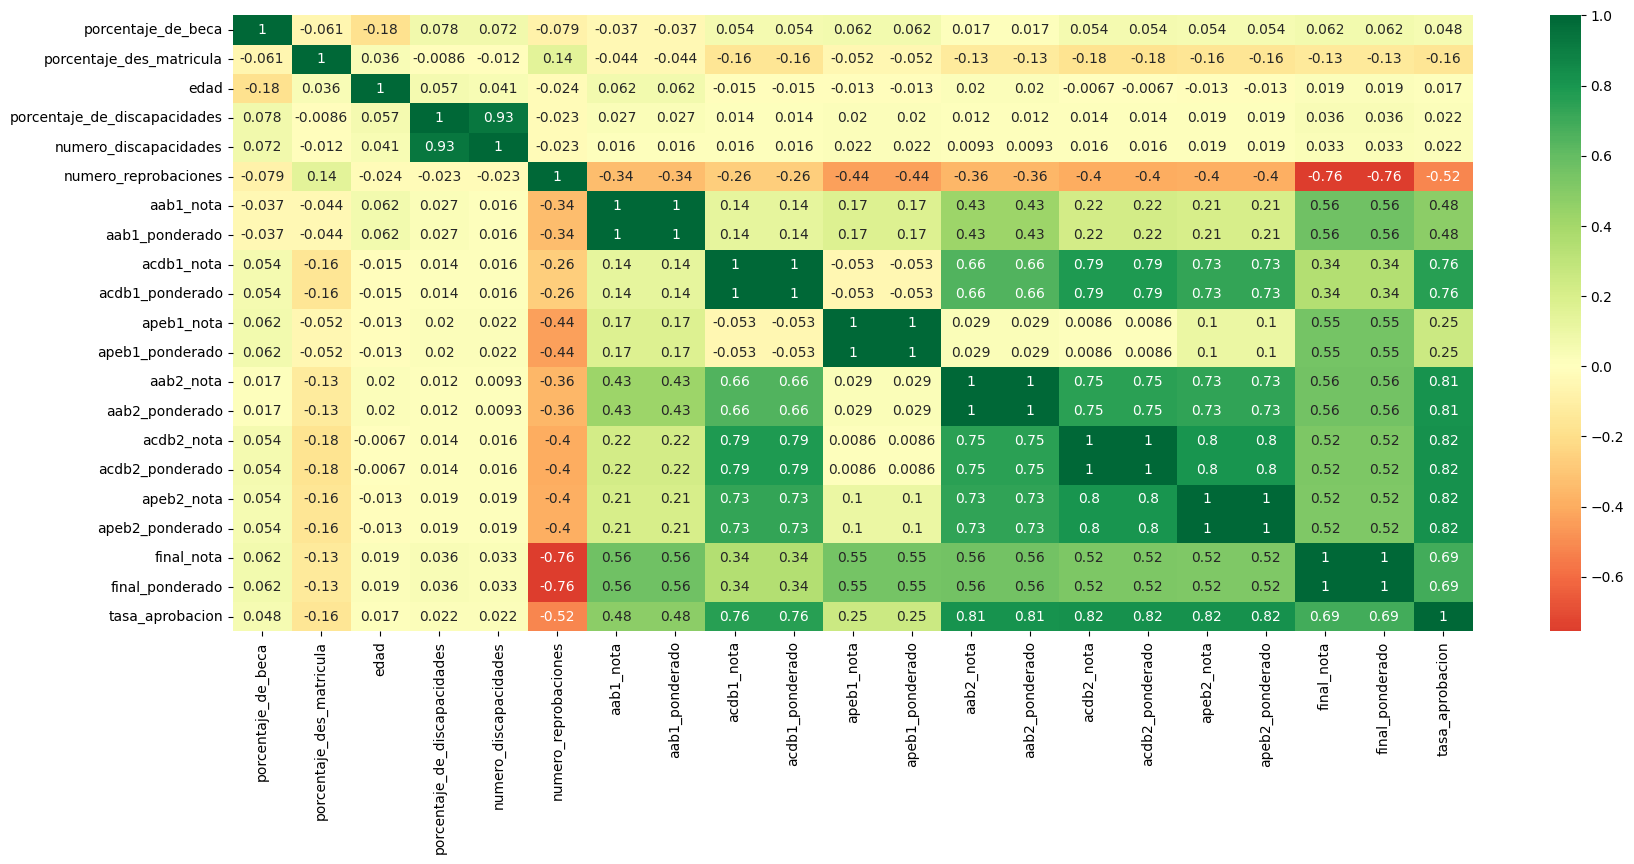

In [9]:
selected_columns = list(final_data.select_dtypes(include = ['int64', 'float64']).columns)
plt.figure(figsize = (20,8))
sns.heatmap(
    final_data[selected_columns].corr(numeric_only = True), 
    cmap = 'RdYlGn',
    center = 0,
    annot = True
)

<Axes: xlabel='status', ylabel='count'>

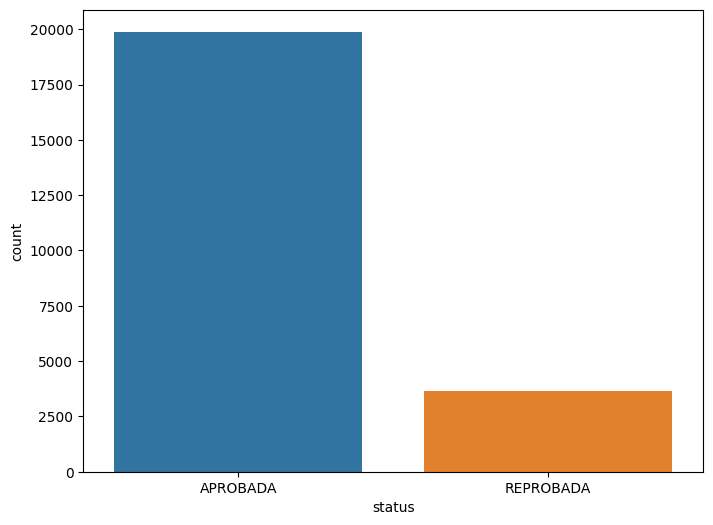

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(
    data = final_data, 
    x = 'status'
)

# Convertir variables categóricas a valores enteros

In [11]:
final_data.head(10)

,fake_identificacion,ciclo_academico,codigo_programa,codigo_malla,codigo_periodo,region,zona,centro,tipo_de_est_programa,tipo_de_ingreso,periodo_admision,estatus_cursos,estatus_de_pago,descripcion_de_becas,porcentaje_de_beca,descripcion_descuento,porcentaje_des_matricula,monto_descuento_automatico,convenios_y_contratos,formas_de_pago,tipo_de_pago,provincia,canton,edad,sexo,discapacidad,tipo_discapacidad,porcentaje_de_discapacidades,numero_discapacidades,curso_codigo,curso_nombre,numero_reprobaciones,status,aab1_nota,aab1_ponderado,acdb1_nota,acdb1_ponderado,apeb1_nota,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
0,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,202062.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESCUENTO COVID-19 ARANCELES GRADO - DESCUENT...,20.0,90.26,MINISTERIO DEL INTERIOR - POLICIA NACIONAL DEL...,BANCOS ON LINE,PAGO EN BANCO,NO DEFINIDO,NO DEFINIDO,24.0,MUJER,NO,NO DEFINIDO,0,0,DSOF_3047,PLATAFORMAS EMERGENTES,0,APROBADA,8.71,30.49,10.00,35.00,10.00,30.00,8.91,31.19,10.00,35.00,5.00,15.00,8.84,88.4,0.83
1,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,202062.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESCUENTO COVID-19 ARANCELES GRADO - DESCUENT...,20.0,90.26,MINISTERIO DEL INTERIOR - POLICIA NACIONAL DEL...,BANCOS ON LINE,PAGO EN BANCO,NO DEFINIDO,NO DEFINIDO,24.0,MUJER,NO,NO DEFINIDO,0,0,DSOF_3043,PLANIFICACION ESTRATEGICA Y SI,0,APROBADA,8.03,28.10,10.00,35.00,8.67,26.01,5.11,17.89,9.57,33.49,8.37,25.11,8.28,82.8,0.83
2,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,202062.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESCUENTO COVID-19 ARANCELES GRADO - DESCUENT...,20.0,90.26,MINISTERIO DEL INTERIOR - POLICIA NACIONAL DEL...,BANCOS ON LINE,PAGO EN BANCO,NO DEFINIDO,NO DEFINIDO,24.0,MUJER,NO,NO DEFINIDO,0,0,DSOF_3044,METODOLOGIAS DE DESARROLLO,0,APROBADA,7.69,26.92,10.00,35.00,9.17,27.51,7.31,25.59,10.00,35.00,8.83,26.49,8.83,88.3,1.00
3,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,202062.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESCUENTO COVID-19 ARANCELES GRADO - DESCUENT...,20.0,90.26,MINISTERIO DEL INTERIOR - POLICIA NACIONAL DEL...,BANCOS ON LINE,PAGO EN BANCO,NO DEFINIDO,NO DEFINIDO,24.0,MUJER,NO,NO DEFINIDO,0,0,DSOF_3045,GESTION DE LA CALIDAD DEL SOFT,0,APROBADA,5.63,19.70,10.00,35.00,5.07,15.21,6.03,21.11,9.57,33.49,10.00,30.00,7.73,77.3,0.50
4,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,202062.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESCUENTO COVID-19 ARANCELES GRADO - DESCUENT...,20.0,90.26,MINISTERIO DEL INTERIOR - POLICIA NACIONAL DEL...,BANCOS ON LINE,PAGO EN BANCO,NO DEFINIDO,NO DEFINIDO,24.0,MUJER,NO,NO DEFINIDO,0,0,DSOF_3046,INGENIERIA DE REQUISITOS,0,APROBADA,7.54,26.39,10.00,35.00,8.77,26.31,7.46,26.11,8.00,28.00,8.50,25.50,8.37,83.7,1.00
5,XTLA48155273548078,7,INFO_D1,IFD6,202262,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,202062.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESC RED. FAC. INGENIERIAS Y ARQUITECTURA GR.D...,20.0,108.31,MINISTERIO DEL INTERIOR - POLICIA NACIONAL DEL...,BANCOS ON LINE,PAGO EN BANCO,NO DEFINIDO,NO DEFINIDO,24.0,MUJER,NO,NO DEFINIDO,0,0,DRBD_4018,ARQUITECTURA DE REDES,0,APROBADA,7.51,26.28,9.71,33.98,9.17,27.51,8.23,28.80,7.51,26.28,7.83,23.49,8.32,83.2,1.00
6,XTLA48155273548078,7,INFO_D1,IFD6,202262,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,202062.0,CURSOS INSCRITOS,CON PAGO TOTAL,CONVENIO DE ADJUDICACIÓN DE BE,10.0,DESC RED. FAC. IN

In [12]:
final_data.region.value_counts()

QUITO             11736
CUENCA             3764
GUAYAQUIL          3226
LOJA               2927
SANTO DOMINGO      1671
ESPAÑA               91
ESTADOS UNIDOS       65
ITALIA               63
Name: region, dtype: int64

In [13]:
object_columns = final_data.select_dtypes(include = ['object']).columns
for column in object_columns:
    final_data[column] = final_data[column].astype('category').cat.codes

final_data.head(10)

,fake_identificacion,ciclo_academico,codigo_programa,codigo_malla,codigo_periodo,region,zona,centro,tipo_de_est_programa,tipo_de_ingreso,periodo_admision,estatus_cursos,estatus_de_pago,descripcion_de_becas,porcentaje_de_beca,descripcion_descuento,porcentaje_des_matricula,monto_descuento_automatico,convenios_y_contratos,formas_de_pago,tipo_de_pago,provincia,canton,edad,sexo,discapacidad,tipo_discapacidad,porcentaje_de_discapacidades,numero_discapacidades,curso_codigo,curso_nombre,numero_reprobaciones,status,aab1_nota,aab1_ponderado,acdb1_nota,acdb1_ponderado,apeb1_nota,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
0,1601,6,0,0,3,6,5,67,0,0,1,0,0,68,10.0,33,20.0,1173,137,10,1,17,138,24.0,1,0,4,0,0,30,45,0,0,8.71,30.49,10.00,35.00,10.00,30.00,8.91,31.19,10.00,35.00,5.00,15.00,8.84,88.4,0.83
1,1601,6,0,0,3,6,5,67,0,0,1,0,0,68,10.0,33,20.0,1173,137,10,1,17,138,24.0,1,0,4,0,0,26,44,0,0,8.03,28.10,10.00,35.00,8.67,26.01,5.11,17.89,9.57,33.49,8.37,25.11,8.28,82.8,0.83
2,1601,6,0,0,3,6,5,67,0,0,1,0,0,68,10.0,33,20.0,1173,137,10,1,17,138,24.0,1,0,4,0,0,27,40,0,0,7.69,26.92,10.00,35.00,9.17,27.51,7.31,25.59,10.00,35.00,8.83,26.49,8.83,88.3,1.00
3,1601,6,0,0,3,6,5,67,0,0,1,0,0,68,10.0,33,20.0,1173,137,10,1,17,138,24.0,1,0,4,0,0,28,34,0,0,5.63,19.70,10.00,35.00,5.07,15.21,6.03,21.11,9.57,33.49,10.00,30.00,7.73,77.3,0.50
4,1601,6,0,0,3,6,5,67,0,0,1,0,0,68,10.0,33,20.0,1173,137,10,1,17,138,24.0,1,0,4,0,0,29,38,0,0,7.54,26.39,10.00,35.00,8.77,26.31,7.46,26.11,8.00,28.00,8.50,25.50,8.37,83.7,1.00
5,1601,7,0,0,4,6,5,67,0,0,1,0,0,68,10.0,7,20.0,64,137,10,1,17,138,24.0,1,0,4,0,0,9,7,0,0,7.51,26.28,9.71,33.98,9.17,27.51,8.23,28.80,7.51,26.28,7.83,23.49,8.32,83.2,1.00
6,1601,7,0,0,4,6,5,67,0,0,1,0,0,68,10.0,7,20.0,64,137,10,1,17,138,24.0,1,0,4,0,0,1,35,0,0,5.17,18.09,8.00,28.00,6.50,19.50,6.60,23.10,8.57,29.99,8.33,24.99,7.19,71.9,0.50
7,1601,7,0,0,4,6,5,67,0,0,1,0,0,68,10.0,7,20.0,64,137,10,1,17,138,24.0,1,0,4,0,0,32,8,0,0,8.03,28.10,8.23,28.80,8.50,25.50,8.69,30.41,8.57,29.99,5.33,15.99,7.94,79.4,0.83
8,1601,7,0,0,4,6,5,67,0,0,1,0,0,68,10.0,7,20.0,64,137,10,1,17,138,24.0,1,0,4,0,0,33,9,0,0,8.57,29.99,10.00,35.00,9.50,28.50,9.77,34.20,7.71,26.99,10.00,30.00,9.24,92.4,1.00
9,1601,7,0,0,4,6,5,67,0,0,1,0,0,68,10.0,7,20.0,64,137,10,1,17,138,24.0,1,0,4,0,0,34,42,0,0,8.57,29.99,10.00,35.00,10.00,30.00,8.69,30.41,9.43,33.01,9.33,27.99,9.32,93.2,1.00


In [14]:
final_data.region.value_counts()

6    11736
0     3764
3     3226
5     2927
7     1671
1       91
2       65
4       63
Name: region, dtype: int64